In [1]:
import pandas as pd
import numpy as np


from google.colab import drive

drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
# load the dataset into a dataframe
df = pd.read_csv("./drive/My Drive/Datasets/housing.csv")
df.head()

# check info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
# Check for missing values
df.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
# Replace missing values in 'total_bedrooms' with the mean value of that column
mean_total_bedrooms = df['total_bedrooms'].mean()
df['total_bedrooms'].fillna(mean_total_bedrooms, inplace=True)


In [5]:
# check if the missing values have been replaced
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [6]:
# let's check how many districts belong to each attribute
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
# Let's check the summary statistics of the numerical attributes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20640.0,537.870553,419.266592,1.0000,297.0000,438.0000,643.25000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


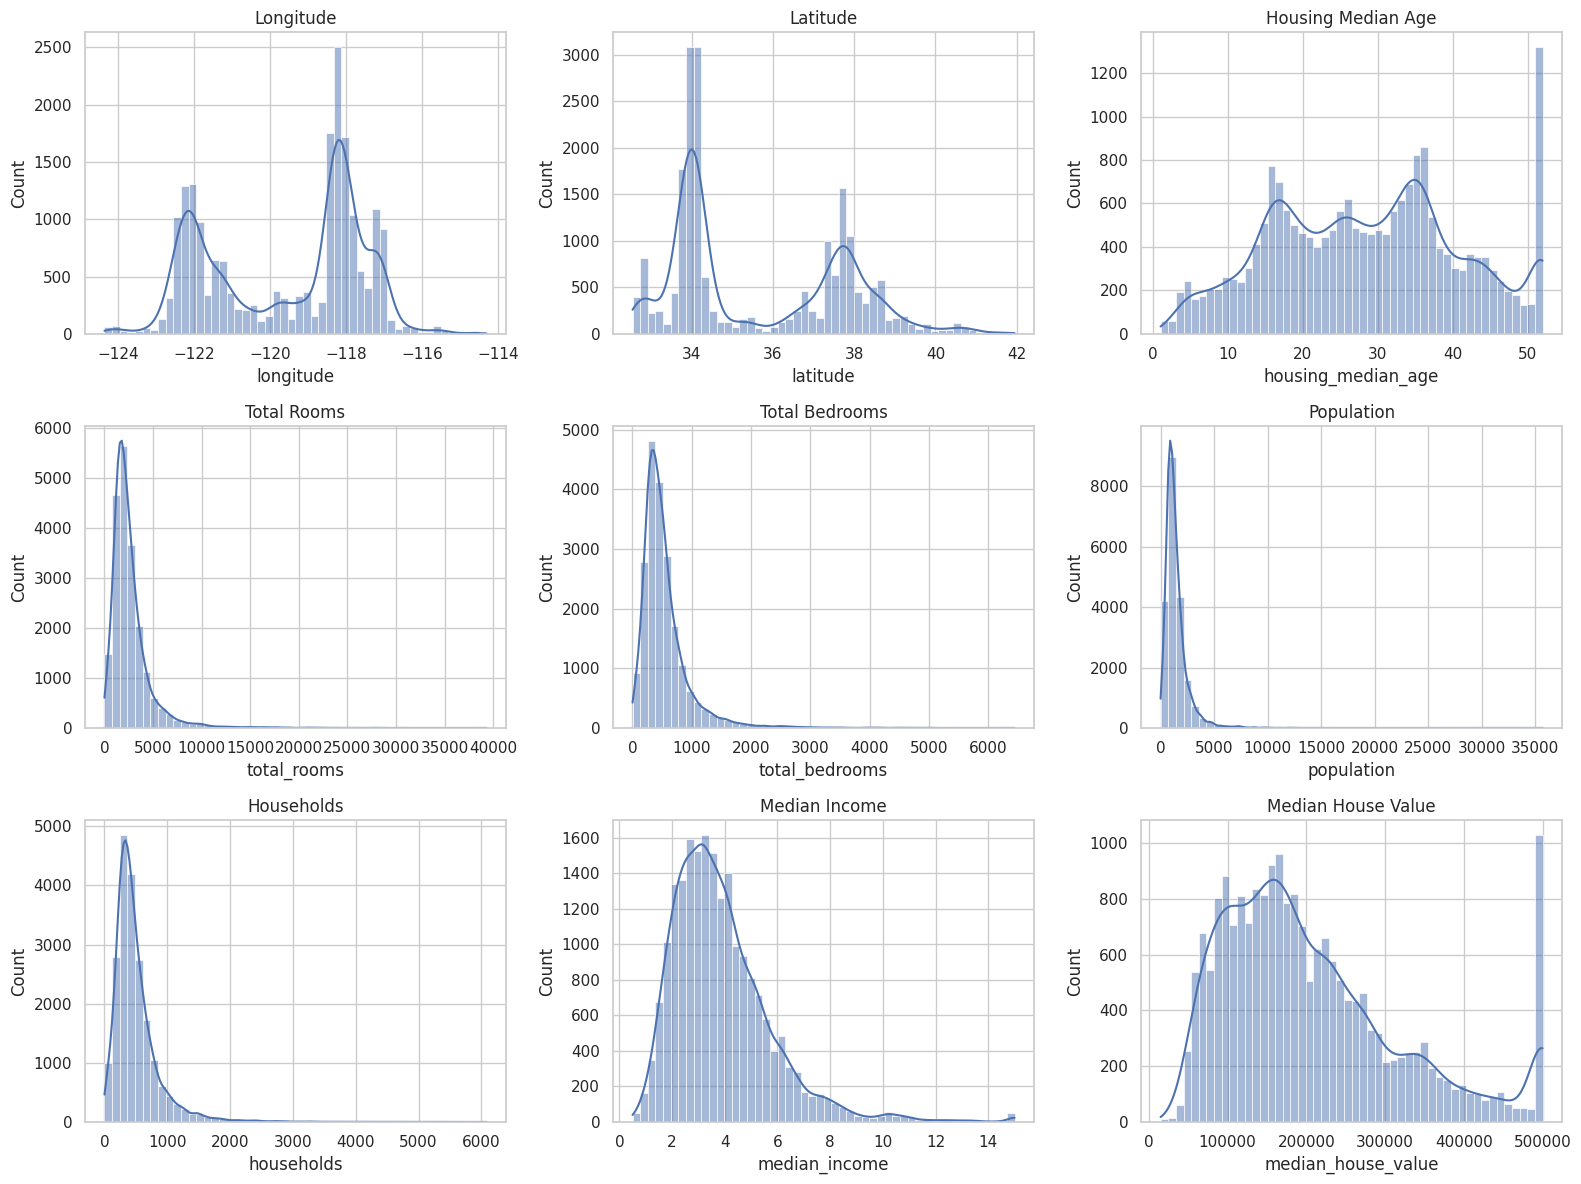

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots (optional)
sns.set(style="whitegrid")

# Create subplots for multiple histograms
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))

# Plot histograms for numerical attributes
sns.histplot(df['longitude'], bins=50, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Longitude')

sns.histplot(df['latitude'], bins=50, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Latitude')

sns.histplot(df['housing_median_age'], bins=50, ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Housing Median Age')

sns.histplot(df['total_rooms'], bins=50, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Total Rooms')

sns.histplot(df['total_bedrooms'].dropna(), bins=50, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Total Bedrooms')

sns.histplot(df['population'], bins=50, ax=axes[1, 2], kde=True)
axes[1, 2].set_title('Population')

sns.histplot(df['households'], bins=50, ax=axes[2, 0], kde=True)
axes[2, 0].set_title('Households')

sns.histplot(df['median_income'], bins=50, ax=axes[2, 1], kde=True)
axes[2, 1].set_title('Median Income')

sns.histplot(df['median_house_value'], bins=50, ax=axes[2, 2], kde=True)
axes[2, 2].set_title('Median House Value')

# Adjust layout
plt.tight_layout()

# Show the histograms
plt.show()


In [9]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Calculate correlations with respect to 'median_house_value' for numerical attributes
numerical_attributes = df.select_dtypes(include=['number'])
correlations = numerical_attributes.corr()
correlations_with_target = correlations["median_house_value"].sort_values(ascending=False)

# Display the sorted correlations
print(correlations_with_target)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


<Axes: xlabel='median_income', ylabel='median_house_value'>

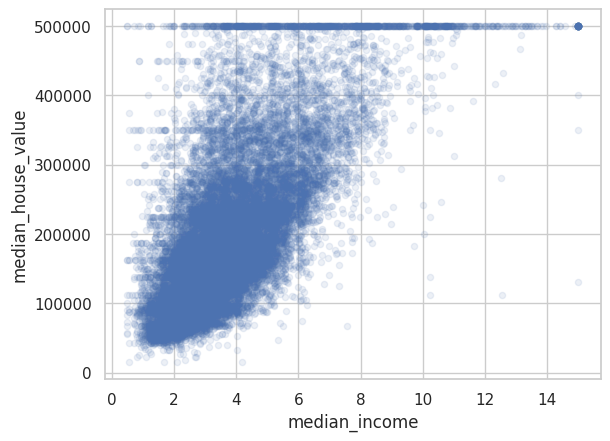

In [10]:
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)


In [11]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]


In [12]:
# Calculate correlations with respect to 'median_house_value' for numerical attributes
numerical_attributes = df.select_dtypes(include=['number'])
correlations = numerical_attributes.corr()
correlations_with_target = correlations["median_house_value"].sort_values(ascending=False)

# Display the sorted correlations
print(correlations_with_target)


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049454
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.220049
Name: median_house_value, dtype: float64


In [13]:
# Copy the original dataset to create a clean dataset
df_clean = df.copy()

# Separate the predictors (features) and labels (target values)
housing_labels = df_clean["median_house_value"].copy()  # Labels
df_clean = df_clean.drop("median_house_value", axis=1)     # Predictors


In [14]:
# Replace missing values
imputer = SimpleImputer(strategy="median")
df_clean_numeric = df_clean.drop("ocean_proximity", axis=1)
imputer.fit(df_clean_numeric)
X = imputer.transform(df_clean_numeric)
df_clean_transformed = pd.DataFrame(X, columns=df_clean_numeric.columns)


In [15]:
# Encode categorical attributes
categorical_columns = ["ocean_proximity"]
column_transformer = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), categorical_columns)],
    remainder="passthrough"
)
df_encoded = column_transformer.fit_transform(df_clean)


In [16]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_encoded)

# Split the data into features (X) and the target variable (y)
X = X_train_scaled  # Use the scaled features
y = housing_labels  # Target variable

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [18]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error: 5569121311.08
R-squared (R2) Score: 0.58


In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
explained_variance = explained_variance_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Explained Variance Score: {explained_variance:.2f}")

Mean Absolute Error: 51511.95
Root Mean Squared Error: 74626.55
Explained Variance Score: 0.58


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees (for Random Forest)
    'max_depth': [10, 20, 30],      # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],   # Minimum samples required at a leaf node
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Use MSE as the scoring metric
                           cv=5)  # 5-fold cross-validation

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f"Best Model Mean Squared Error: {mse_best:.2f}")
print(f"Best Model R-squared (R2) Score: {r2_best:.2f}")


Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Model Mean Squared Error: 2457965223.27
Best Model R-squared (R2) Score: 0.81
